In [38]:
import pandas as pd
import numpy as np

-----

# The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [39]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [40]:
x_train.shape

(50000, 32, 32, 3)

In [41]:
x_train[0].shape

(32, 32, 3)

In [42]:
import matplotlib.pyplot as plt

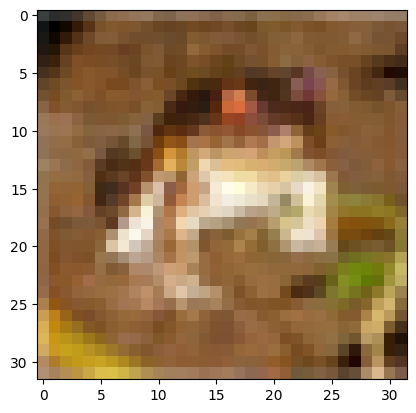

In [43]:
# FROG
plt.imshow(x_train[0])

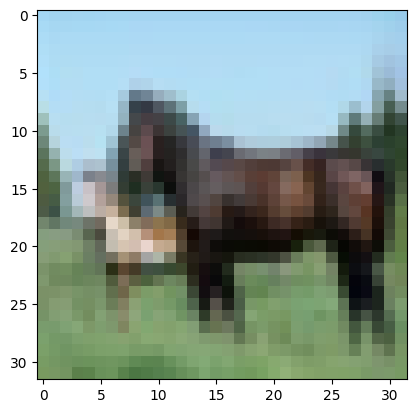

In [44]:
# HORSE
plt.imshow(x_train[12])

# PreProcessing

In [45]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [46]:
x_train[0].shape

(32, 32, 3)

In [47]:
x_train.max()

255

In [48]:
x_train = x_train/255

In [49]:
x_test = x_test/255

In [50]:
x_train.shape

(50000, 32, 32, 3)

In [51]:
x_test.shape

(10000, 32, 32, 3)

## Labels

In [52]:
from tensorflow.keras.utils import to_categorical

In [53]:
y_train.shape

(50000, 1)

In [54]:
y_train[0]

array([6], dtype=uint8)

In [55]:
y_cat_train = to_categorical(y_train,10)

In [56]:
y_cat_train.shape

(50000, 10)

In [57]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [58]:
y_cat_test = to_categorical(y_test,10)

----------
# Building the Model

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [60]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [61]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 256)              

In [62]:
from tensorflow.keras.callbacks import EarlyStopping

In [63]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [64]:
model.fit(x_train,y_cat_train,epochs=30,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/30
1563/1563 [==============================] - 44s 27ms/step - loss: 1.5454 - accuracy: 0.4434 - val_loss: 1.3781 - val_accuracy: 0.5074
Epoch 2/30
1563/1563 [==============================] - 47s 30ms/step - loss: 1.1882 - accuracy: 0.5815 - val_loss: 1.2039 - val_accuracy: 0.5807
Epoch 3/30
1563/1563 [==============================] - 45s 29ms/step - loss: 1.0386 - accuracy: 0.6368 - val_loss: 1.0551 - val_accuracy: 0.6340
Epoch 4/30
1563/1563 [==============================] - 40s 25ms/step - loss: 0.9287 - accuracy: 0.6781 - val_loss: 1.0710 - val_accuracy: 0.6334
Epoch 5/30
1563/1563 [==============================] - 44s 28ms/step - loss: 0.8425 - accuracy: 0.7088 - val_loss: 0.9936 - val_accuracy: 0.6591
Epoch 6/30
1563/1563 [==============================] - 43s 27ms/step - loss: 0.7718 - accuracy: 0.7351 - val_loss: 1.0361 - val_accuracy: 0.6639
Epoch 7/30
1563/1563 [==============================] - 43s 27ms/step - loss: 0.7081 - accuracy: 0.7580 - val_loss: 1.0243 -

In [65]:
# Careful, don't overwrite our file!
model.save('cifar_10epochs.h5')

c:\Users\Marc\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [66]:
losses = pd.DataFrame(model.history.history)

In [67]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.545389,0.44344,1.378144,0.5074
1,1.188174,0.58148,1.203882,0.5807
2,1.038633,0.63682,1.055136,0.6340
3,0.928676,0.67806,1.070984,0.6334
4,0.842479,0.70880,0.993616,0.6591


<Axes: >

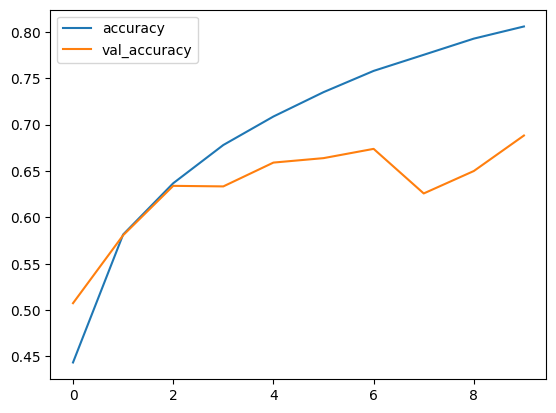

In [68]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

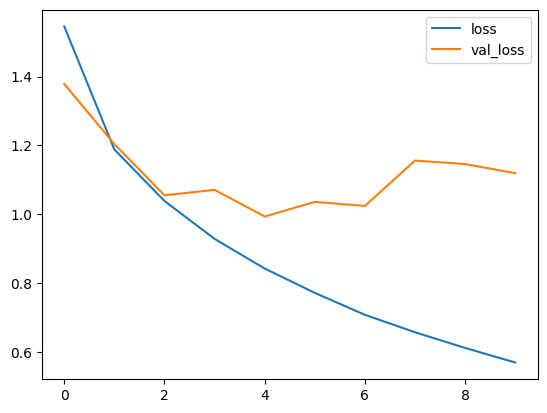

In [69]:
losses[['loss','val_loss']].plot()

In [70]:
model.metrics_names

['loss', 'accuracy']

In [71]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.119415044784546, 0.6883000135421753]


In [72]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict(x_test)
predictions = np.argmax(predictions,axis=1)

313/313 [==============================] - 2s 6ms/step


In [73]:
print(classification_report(y_test,predictions,digits=4))

              precision    recall  f1-score   support

           0     0.7621    0.6950    0.7270      1000
           1     0.7810    0.8240    0.8019      1000
           2     0.6576    0.5050    0.5713      1000
           3     0.5342    0.4610    0.4949      1000
           4     0.6932    0.5920    0.6386      1000
           5     0.5206    0.6820    0.5905      1000
           6     0.7152    0.8160    0.7623      1000
           7     0.7929    0.6930    0.7396      1000
           8     0.7525    0.8120    0.7811      1000
           9     0.7019    0.8030    0.7491      1000

    accuracy                         0.6883     10000
   macro avg     0.6911    0.6883    0.6856     10000
weighted avg     0.6911    0.6883    0.6856     10000



In [74]:
confusion_matrix(y_test,predictions)

array([[695,  30,  50,  17,  14,   9,  17,   6, 106,  56],
       [ 12, 824,   3,   7,   3,  12,  13,   5,  30,  91],
       [ 63,  12, 505,  60,  68, 123,  89,  28,  24,  28],
       [ 21,  17,  46, 461,  61, 232,  78,  29,  23,  32],
       [ 19,   4,  68,  63, 592,  77,  69,  69,  22,  17],
       [ 15,   9,  31, 139,  34, 682,  30,  35,   8,  17],
       [  4,  12,  23,  50,  32,  39, 816,   4,   6,  14],
       [ 24,   4,  23,  44,  44, 112,  12, 693,   8,  36],
       [ 46,  48,   9,  12,   3,  10,   9,   1, 812,  50],
       [ 13,  95,  10,  10,   3,  14,   8,   4,  40, 803]], dtype=int64)

<Axes: >

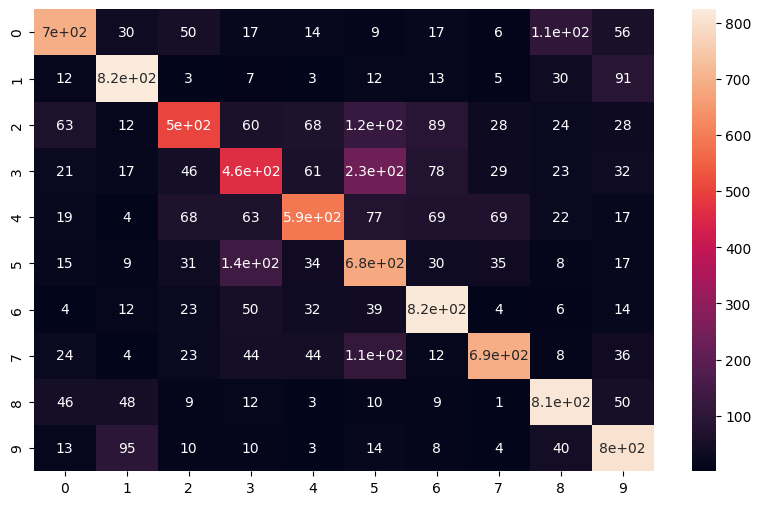

In [75]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
# https://github.com/matplotlib/matplotlib/issues/14751

# Predicting a given image

In [76]:
my_image = x_test[16]

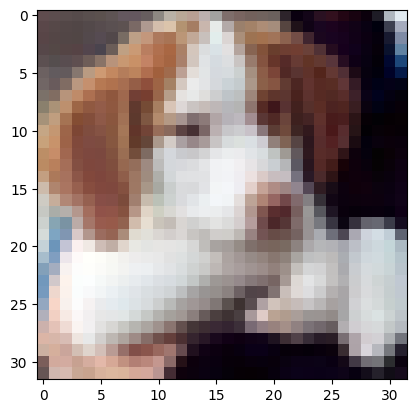

In [77]:
plt.imshow(my_image)

In [78]:
# SHAPE --> (num_images,width,height,color_channels)
pred = model.predict(my_image.reshape(1,32,32,3))
pred = np.argmax(pred,axis=1)
pred

1/1 [==============================] - 0s 51ms/step


array([5], dtype=int64)

In [79]:
# 5 is DOG
# https://www.cs.toronto.edu/~kriz/cifar.html